In [1157]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn

In [1158]:
#Extracting the data
df = pd.read_csv("./CO2 Emission by Vehicles/CO2_Emissions_Canada.csv")

In [1159]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Pre-Processing

In [1160]:
# Checking null values
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [1161]:
#Checking null values
(df == '?').sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [1162]:
# unique values for different column
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [1163]:
len(df)

7385

In [1164]:
# I want to encode all the string data column
# So I will drop the model column because there are many different data which will create so many columns
df.drop(axis = "columns", labels = "Model", inplace=True)

In [1165]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [1166]:
df.nunique()

Make                                 42
Vehicle Class                        16
Engine Size(L)                       51
Cylinders                             8
Transmission                         27
Fuel Type                             5
Fuel Consumption City (L/100 km)    211
Fuel Consumption Hwy (L/100 km)     143
Fuel Consumption Comb (L/100 km)    181
Fuel Consumption Comb (mpg)          54
CO2 Emissions(g/km)                 331
dtype: int64

In [1167]:
df["Vehicle Class"].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [1168]:
# Checking the duplicated data
df.duplicated().sum()

2171

In [1169]:
#dropping the duplicate data
df.drop(axis = "rows", labels = df.index[df.duplicated()], inplace = True)

In [1170]:
len(df)

5214

In [1171]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,3.129900,5.552934,12.544687,9.043402,10.969141,27.582278,249.550249
std,1.355553,1.823861,3.584654,2.324962,2.984861,7.331877,59.478890
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.000000,7.400000,8.800000,22.000000,206.000000
50%,3.000000,6.000000,12.000000,8.600000,10.500000,27.000000,244.000000
75%,3.700000,6.000000,14.500000,10.200000,12.600000,32.000000,286.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [1172]:
df['Make'].value_counts()

FORD             528
CHEVROLET        458
BMW              340
MERCEDES-BENZ    338
TOYOTA           242
GMC              240
AUDI             221
PORSCHE          202
NISSAN           191
KIA              180
VOLKSWAGEN       179
HYUNDAI          167
HONDA            141
CADILLAC         138
JEEP             129
DODGE            122
MAZDA            119
LEXUS            116
MINI             114
SUBARU           111
VOLVO            106
BUICK             87
INFINITI          85
LINCOLN           77
MITSUBISHI        71
JAGUAR            58
RAM               56
CHRYSLER          51
LAND ROVER        51
ACURA             47
MASERATI          41
FIAT              36
ROLLS-ROYCE       34
BENTLEY           33
LAMBORGHINI       27
ASTON MARTIN      27
SCION             21
GENESIS           14
ALFA ROMEO        10
SMART              4
SRT                1
BUGATTI            1
Name: Make, dtype: int64

In [1173]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [1174]:
df.nunique()

Make                                 42
Vehicle Class                        16
Engine Size(L)                       51
Cylinders                             8
Transmission                         27
Fuel Type                             5
Fuel Consumption City (L/100 km)    211
Fuel Consumption Hwy (L/100 km)     143
Fuel Consumption Comb (L/100 km)    181
Fuel Consumption Comb (mpg)          54
CO2 Emissions(g/km)                 331
dtype: int64

In [1175]:
# I will one hot encode all the string data columns
column_names_to_one_hot = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

In [1176]:
df = pd.get_dummies(df, columns=column_names_to_one_hot)

In [1177]:
#Standardizing all the data except the columns whose value is either 1 or 0 and the target column
labels = ["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]
for i in labels:
    df[i] = (df[i]- df[i].mean())/df[i].std()
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.833535,-0.851454,-0.737780,-1.007931,-0.827221,0.738927,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.538452,-0.851454,-0.375123,-0.577817,-0.458695,0.193364,221,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-1.202388,-0.851454,-1.825752,-1.395034,-1.698284,2.784788,136,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.273025,0.245120,0.043327,0.024343,0.043841,-0.352199,255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.273025,0.245120,-0.124053,-0.147702,-0.123671,-0.079417,244,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1178]:
#dropping Fuel_type_N because there is only one data sample for it
df.drop(axis = "columns", labels = "Fuel Type_N", inplace=True)

In [1179]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,-0.833535,-0.851454,-0.737780,-1.007931,-0.827221,0.738927,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.538452,-0.851454,-0.375123,-0.577817,-0.458695,0.193364,221,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.202388,-0.851454,-1.825752,-1.395034,-1.698284,2.784788,136,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.273025,0.245120,0.043327,0.024343,0.043841,-0.352199,255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.273025,0.245120,-0.124053,-0.147702,-0.123671,-0.079417,244,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1180]:
# Matrix that will tell that the target value is most related to which feature
corr_df = abs(df.corr())

In [1181]:
# As we can see the target value is most related to Fuel Consumption City (L/100 km) feature

<AxesSubplot:>

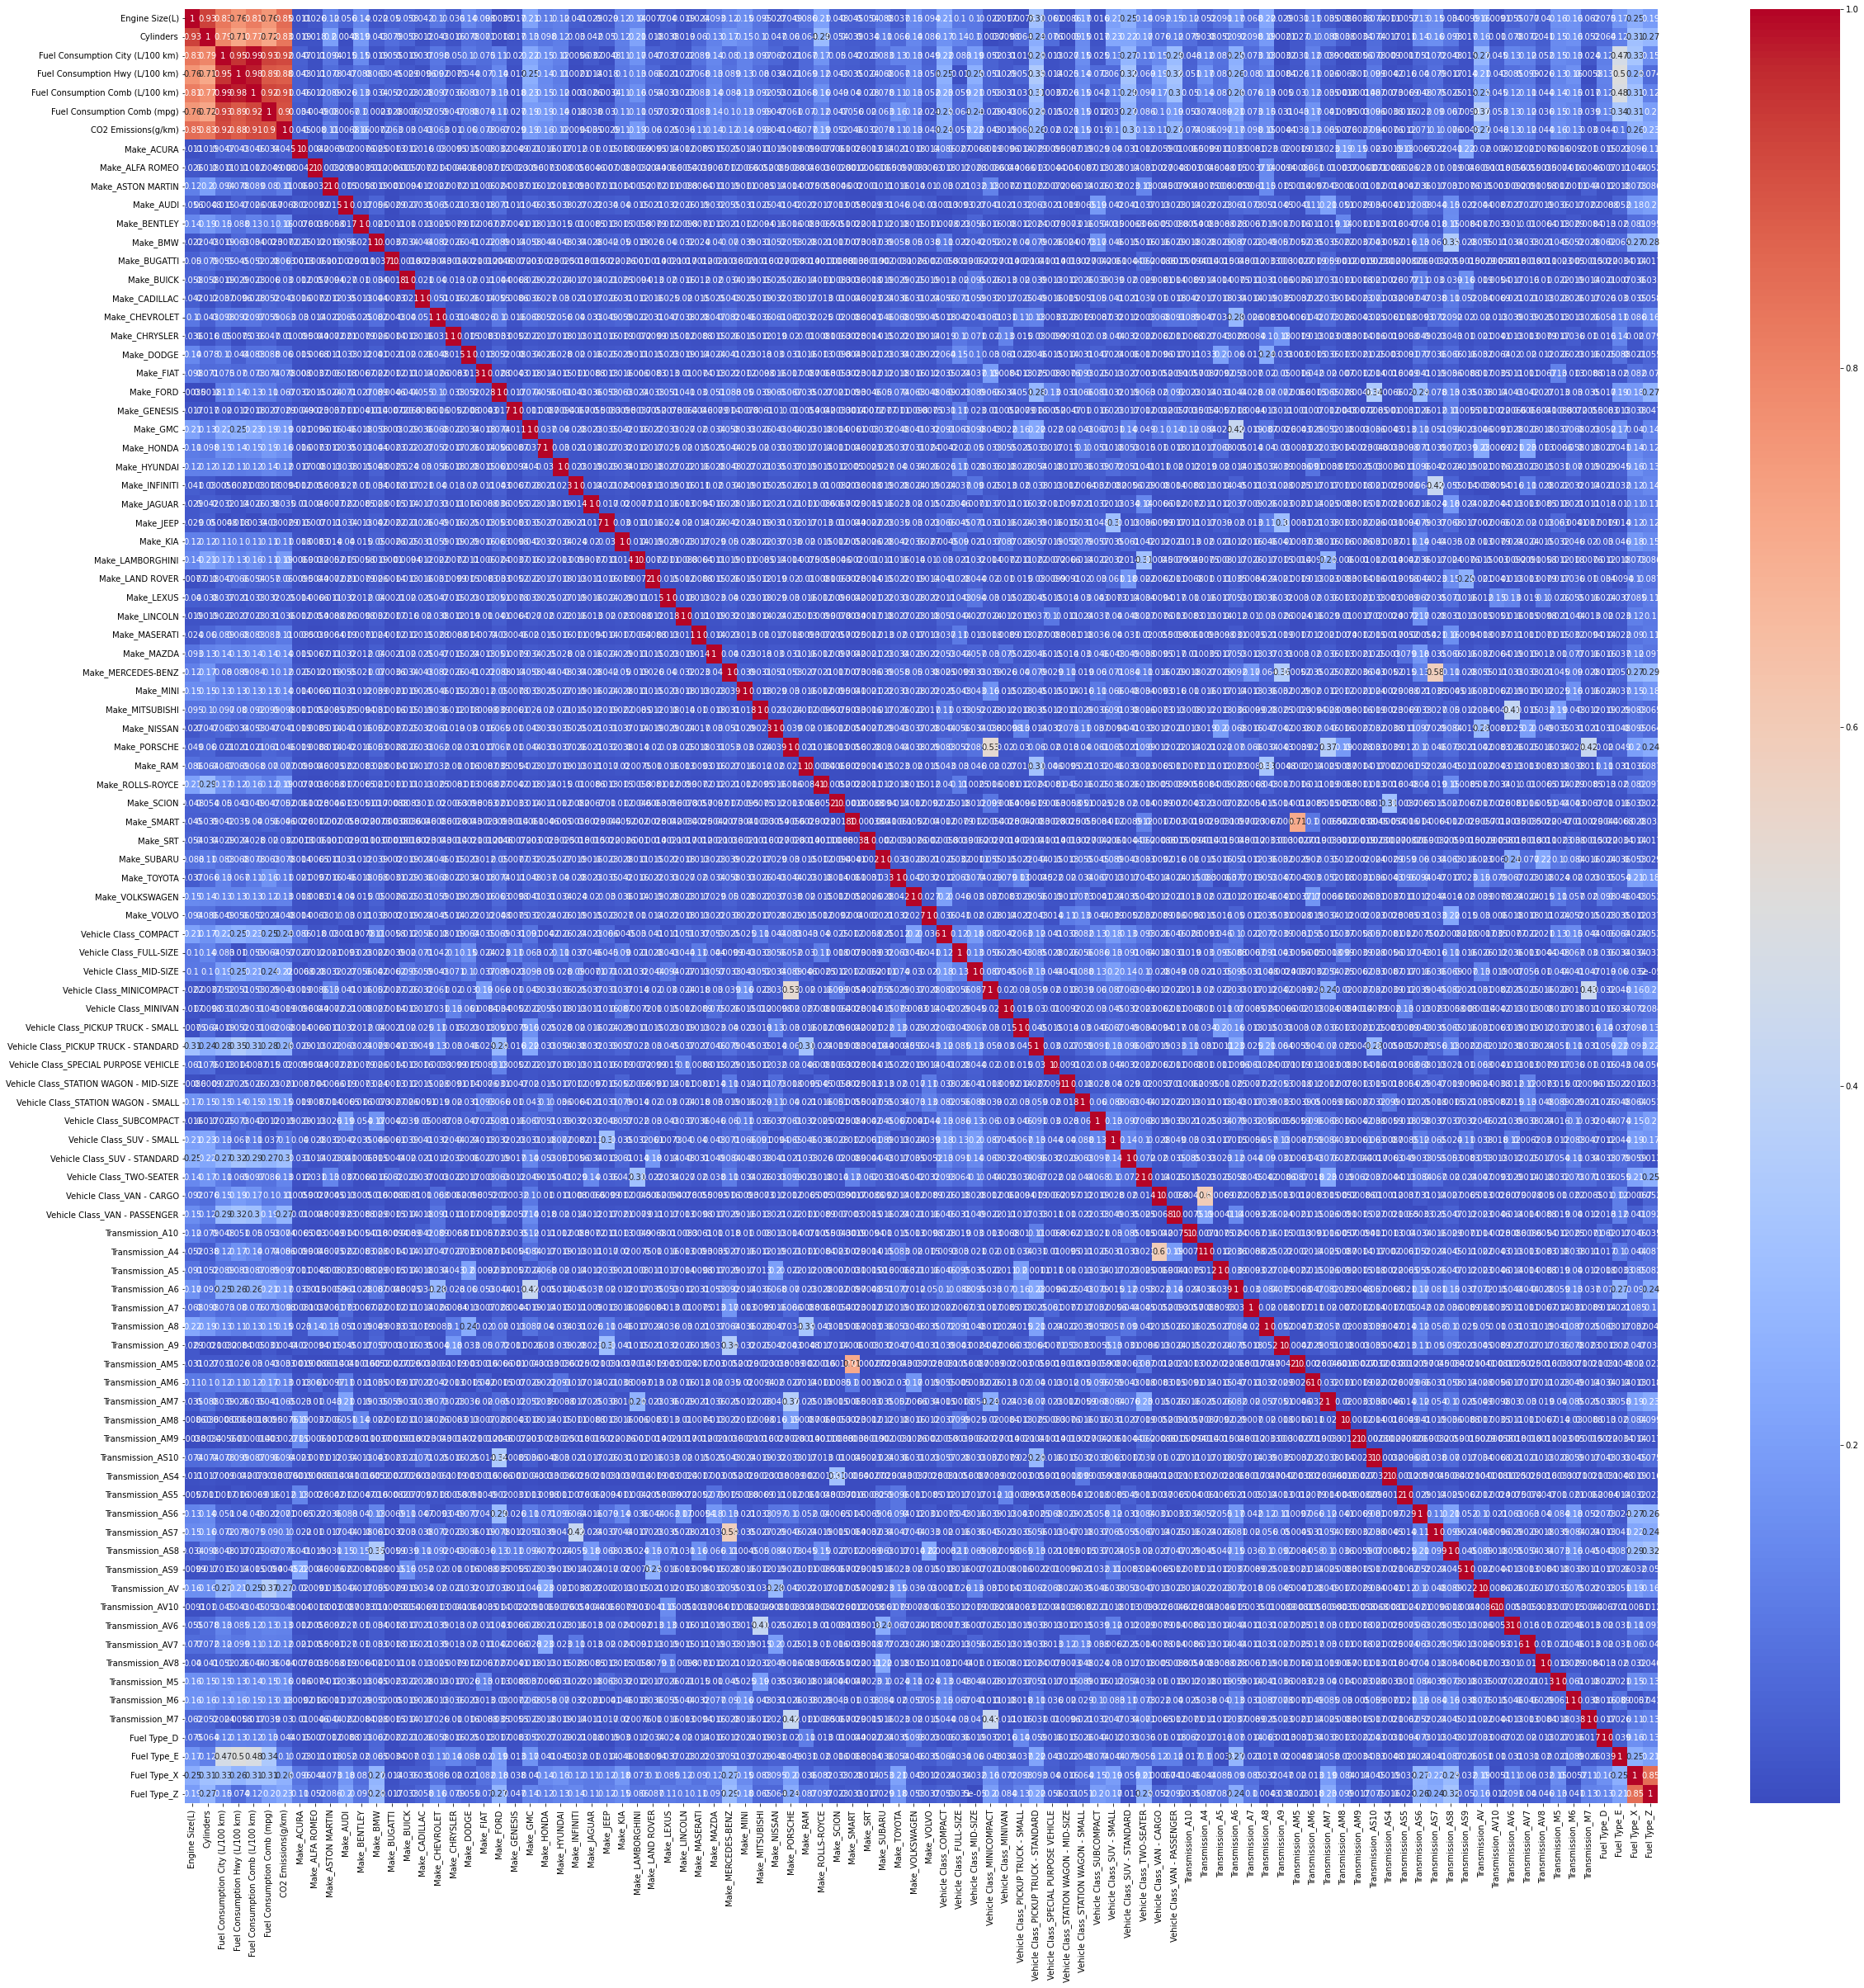

In [1182]:
plt.figure(figsize=(40,40))
seaborn.heatmap(corr_df, cmap='coolwarm',annot=True)
#Heatmap plot

Splitting into train and test

In [1183]:
#splitting the data into train and test data
rain_data = df.sample(frac = 0.65, random_state = 50)
test_data = df.drop(train_data.index)

In [1184]:
X = train_data.drop(axis = "columns", labels = "CO2 Emissions(g/km)").to_numpy().astype(np.float64)
Y = train_data["CO2 Emissions(g/km)"].to_numpy().astype(np.float64)

In [1185]:
X_test = test_data.drop(axis = "columns", labels = "CO2 Emissions(g/km)").to_numpy().astype(np.float64)
Y_test = test_data["CO2 Emissions(g/km)"].to_numpy().astype(np.float64)

In [1186]:

# X = X.to_numpy().astype(np.float64)
# X_test = stats.zscore(X_test)

Closed form Solution for Multivariate

In [1187]:
# Concatenating 1 in X for the bias feature
X_train = np.zeros((X.shape[0], X.shape[1] + 1))
X_train[:, 0] = 1
X_train[:, 1:] = X
X_tst = np.zeros((X_test.shape[0], X_test.shape[1] + 1))
X_tst[:, 0] = 1
X_tst[:, 1:] = X_test

W = (X^TX)^{-1}(X^TY)

In [1188]:
W = np.dot(np.linalg.pinv(X_train), Y)

Ypred = XW

In [1189]:
Y_pred = np.matmul(X_tst, W)

In [1190]:
Y_pred

array([232.76299016, 216.61884313, 231.92609232, ..., 218.64314291,
       209.3561013 , 249.28661251])

In [1191]:
# Calculating Mean Square Error for the test Data 
MSE = np.sum((Y_pred - Y_test)**2)/Y_test.shape[0]

In [1192]:
MSE

33.43676338547167

In [1193]:
# Calculating Mean absolute error for the test Data
MAE = np.sum(np.absolute(Y_pred - Y_test)/Y_test.shape[0])

In [1194]:
MAE

3.3556689786700193

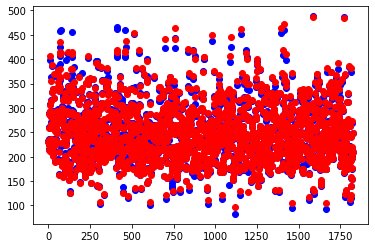

In [1195]:
indexes = [i for i in range(len(Y_pred))]
plt.scatter(x=indexes, y=Y_pred, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_test))]
plt.scatter(x=indexes, y=Y_test, color='red') # Red for data sample

As we know see the target value is most related to Fuel Consumption City (L/100 km)

So we will explore univariate(Closed form) for this feature

In [1196]:
x = train_data["Fuel Consumption City (L/100 km)"].to_numpy().astype(np.float64)
x_test = test_data["Fuel Consumption City (L/100 km)"].to_numpy().astype(np.float64)
train_points = x.shape[0]
test_points = x_test.shape[0]
x = x.reshape((train_points, 1))
x_test = x_test.reshape((test_points, 1))

In [1197]:
# Adding 1 column in x and x_test for the bias term
x_trn = np.zeros((x.shape[0], x.shape[1] + 1))
x_trn[:, 0] = 1
x_trn[:, 1:] = x
x_tst = np.zeros((x_test.shape[0], x_test.shape[1] + 1))
x_tst[:, 0] = 1
x_tst[:, 1:] = x_test

In [1198]:
w = np.dot(np.linalg.pinv(x_trn), Y)

In [1199]:
y_pred = np.matmul(x_tst, w)

In [1200]:
MSE = np.sum((y_pred - Y_test)**2)/Y_test.shape[0]

In [1201]:
MSE

584.5049533453364

In [1202]:
MAE = np.sum(np.absolute(y_pred - Y_test)/Y_test.shape[0])

In [1203]:
MAE

15.099668576572157

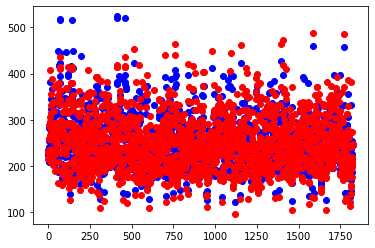

In [1204]:
indexes = [i for i in range(len(y_pred))]
plt.scatter(x=indexes, y=y_pred, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_test))]
plt.scatter(x=indexes, y=Y_test, color='red') # Red for data sample

Gradient Descent Solution for Multivariate

J(W) = Summation(Y - XW)

W_new = W_old - lr*dJ/dW

In [1205]:
lr = 0.12 # learning rate
iterations = 4000 # number of iterations| 

In [1206]:
n_points = Y.shape[0] # number of data points
W_grd = np.random.uniform(low = -12, high = 12, size = X_train.shape[1]) # weight vector
costs = []

In [1207]:
for i in range(iterations):
    Yhat = X_train@W_grd #y_prediction
    cost = np.mean((Y-Yhat)**2)
    costs.append(cost)
    W_grd[0] = W_grd[0] + lr*(1/n_points)*2*(np.sum(Y-X_train@W_grd))
    for j in range(1, W_grd.shape[0]): #for all features
        W_grd[j] = W_grd[j] + (2*lr/n_points)*(np.sum((Y-X_train@W_grd)*X_train.T[j]))

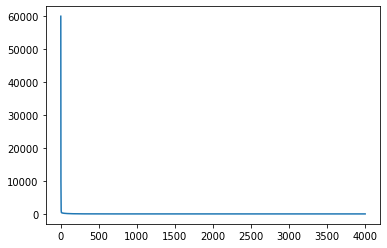

In [1208]:
plt.plot(costs)

Inference for the test data

In [1209]:
Y_pred_test = X_tst@W_grd#inference
MSE = np.sum((Y_pred_test - Y_test)**2)/Y_test.shape[0]# Calculating MSE
MSE

33.73400359812629

In [1210]:
MAE = np.sum(np.absolute(X_tst@W_grd - Y_test)/Y_test.shape[0])# Calculating MAE
MAE

3.345690962703453

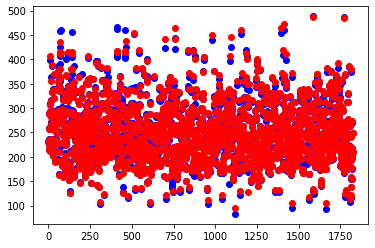

In [1211]:
indexes = [i for i in range(len(Y_pred_test))]
plt.scatter(x=indexes, y=Y_pred_test, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_test))]
plt.scatter(x=indexes, y=Y_test, color='red') # Red for data sample

As we know see the target value is most related to Fuel Consumption City (L/100 km)

So we will explore univariate(Gradient Descent) for this feature

In [1212]:
n_points = Y.shape[0] # number of data points
m_disc, b_disc = np.random.uniform(low = -12, high = 12, size = 2)

In [1213]:
lr = 0.1
iterations = 50000

In [1214]:
for i in range(iterations):
  yhat = m_disc*x + b_disc#y=mx+c
  db = (1/n_points)*(-2*np.sum(Y) + 2*b_disc*n_points + 2*m_disc*np.sum(x))
  dm = (1/n_points)*(-2*Y.T@x + 2*b_disc*np.sum(x) + 2*m_disc*x.T@x)
  m_disc = m_disc - lr*dm
  b_disc = b_disc -lr*db

In [1215]:
y_grd_pred = m_disc*x_test + b_disc
print(y_grd_pred[0].shape)
print(Y_test)

(1,)
[230. 214. 230. ... 219. 210. 248.]


In [1216]:
MSE_test = 0
for i in range(0, len(Y_test)):
    MSE_test += pow((Y_test[i] - y_grd_pred[i]), 2)
MSE_test /= len(Y_test)
float(MSE_test)

584.5049533453365

In [1217]:
MAE_test = 0
for i in range(0, len(Y_test)):
    MAE_test += abs((Y_test[i] - y_grd_pred[i]))
MAE_test /= len(Y_test)
float(MAE_test)
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_grd_pred, Y_test)

15.099668576572203

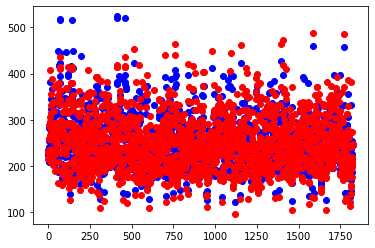

In [1218]:
indexes = [i for i in range(len(y_grd_pred))]
plt.scatter(x=indexes, y=y_grd_pred, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_test))]
plt.scatter(x=indexes, y=Y_test, color='red') # Red for data sample

Classification

In [1219]:
#Extracting Data
main_df = pd.read_csv("./Heart Disease Dataset/heart.csv")
main_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Pre-processing

In [1220]:
#Checking Null values
main_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1221]:
(main_df == '?').sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1222]:
#Checking null values
main_df.duplicated().sum()

723

In [1223]:
#Dropping null values
main_df.drop(axis = "rows", labels = main_df.index[main_df.duplicated()], inplace = True)

In [1224]:
#Checking unique values for all columns
main_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [1225]:
main_df["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [1226]:
main_df["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [1227]:
main_df["slope"].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

In [1228]:
main_df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [1229]:
main_df["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [1230]:
main_df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

One Hot Encoding

In [1231]:
#one hot encoding of the column for which different values are not that much
one_hot_encode_labels = ["cp", "restecg", "slope", "ca", "thal"]
main_df = pd.get_dummies(main_df, columns=one_hot_encode_labels)

In [1232]:
#standardize all the column except the column which take values either 0 or 1 and the target column
columns_to_standardize = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for i in columns_to_standardize:
    main_df[i] = (main_df[i]-main_df[i].mean())/main_df[i].std()
main_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267522,1,-0.375932,-0.666622,0,0.804700,0,-0.037063,0,1,...,1,0,0,1,0,0,0,0,0,1
1,-0.157000,1,0.478117,-0.840523,1,0.237102,1,1.771019,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1.721875,1,0.762800,-1.400872,0,-1.072740,1,1.340523,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.727176,1,0.933609,-0.840523,0,0.499070,0,-0.898054,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0.837698,0,0.364243,0.917813,1,-1.902307,0,0.737829,0,1,...,0,0,0,0,1,0,0,0,1,0


In [1233]:
#Getting the correlation Matrix
corr_df2 = abs(main_df.corr())

<AxesSubplot:>

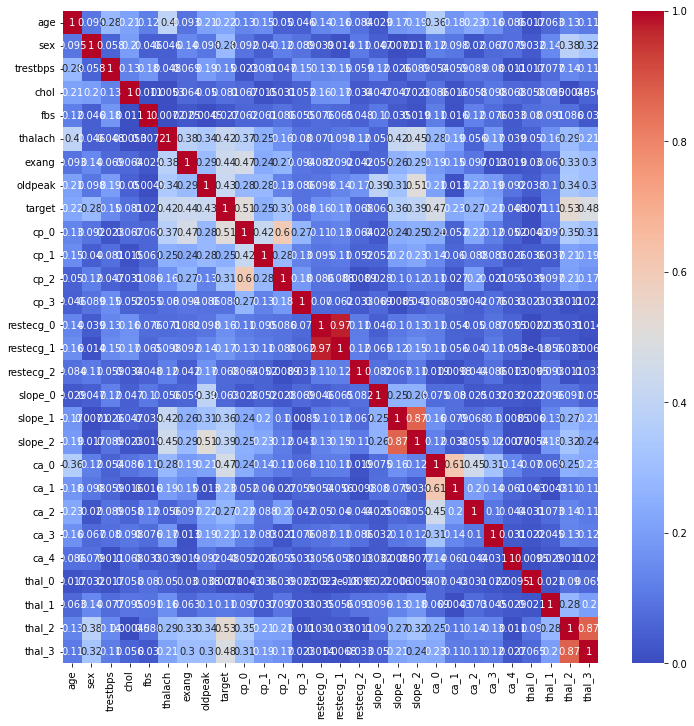

In [1234]:
plt.figure(figsize=(12,12))
seaborn.heatmap(corr_df2, cmap='coolwarm',annot=True)
#Heatmap plot


Splitting the data into test and train

In [1235]:
data_train = main_df.sample(frac = 0.65, random_state = 50) # frac = 0.65
data_test = main_df.drop(data_train.index)

In [1236]:
X_cls = data_train.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)
Y_cls = data_train["target"].to_numpy().astype(np.float64)
X_cls_test = data_test.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)
Y_cls_test = data_test["target"].to_numpy().astype(np.float64)

In [1237]:
#Adding the column of 1 in X for the bias term
Y_count = data_train["target"].nunique() # different values that target can take
X_cls_train = np.zeros((X_cls.shape[0], X_cls.shape[1]+1))
X_cls_train[:,0] = 1
X_cls_train[:,1:] = X_cls
X_cls_test2 = np.zeros((X_cls_test.shape[0], X_cls_test.shape[1]+1))
X_cls_test2[:,0] = 1
X_cls_test2[:,1:] = X_cls_test

In [1238]:
#Initializing the weight vector
W_cls = np.ones((X_cls_train.shape[1], 1))
print(W_cls.shape)

(28, 1)


Gradient descent for Logistic Regression

In [1239]:
#Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [1240]:
yhat = sigmoid(np.dot(X_cls_train, W_cls))
print(yhat.shape)

(196, 1)


In [1241]:
alpha = 0.001
itr = 50000

In [1242]:
#Calculating entropy for the cost
def Entropy(a, b, c):
    return((np.sum(a*np.log(sigmoid(np.dot(b, c))) + (1-a)*np.log(1-sigmoid(np.dot(b, c)))))*(-1))

In [1243]:
m_points = X_cls_train.shape[0]
Y_cls = Y_cls.reshape(m_points, 1)
costs2 = []
for i in range(itr):
    cost2 = Entropy(Y_cls, X_cls_train, W_cls)
    costs2.append(cost2)
    yhat = sigmoid(np.dot(X_cls_train, W_cls))
    dw = (1/m_points)*np.dot(X_cls_train.T, (yhat - Y_cls))
    W_cls = W_cls - alpha*dw

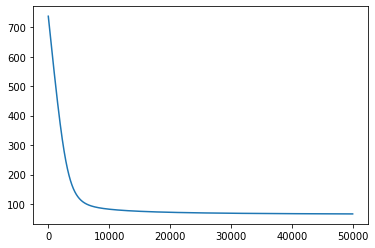

In [1244]:
plt.plot(costs2)

In [1245]:
#Mx = P(Y=1|X_i)
Mx = sigmoid(np.dot(X_cls_test2, W_cls))
print(Mx.shape)
print(W_cls.shape)
print(X_cls_train.shape)
print(W_cls)

(106, 1)
(28, 1)
(196, 28)
[[-0.89630574]
 [ 0.04131164]
 [-1.084774  ]
 [-0.27935924]
 [-0.25970519]
 [ 0.55574427]
 [ 0.52609796]
 [-0.38725861]
 [-0.22071462]
 [-0.63145964]
 [ 0.69782388]
 [ 1.04053436]
 [ 0.99679566]
 [-0.06378392]
 [ 0.24467949]
 [ 0.9227987 ]
 [ 0.6409081 ]
 [-0.31946484]
 [ 0.78225101]
 [ 1.4758835 ]
 [-0.11451448]
 [-0.01983725]
 [ 0.65848715]
 [ 1.10367533]
 [ 0.8885408 ]
 [ 0.69008655]
 [ 1.06685473]
 [-0.54178781]]


In [1246]:
#Initializing yprd
yprd = np.zeros(Mx.shape)
#Classifying into 0 or 1
for i in range(Mx.shape[0]):
    if(Mx[i] > 0.5):
        yprd[i] = 1
    else:
        yprd[i] = 0

In [1247]:
print(yprd)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [1248]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_cls_test, yprd)

0.8679245283018868

Implementing F1 score

In [1249]:
def confusion_matrix_mod(Y, Y_pred):
    Y = pd.Series(Y, name='Actual')
    Y_pred = pd.Series(Y_pred, name='Predicted')
    confusionMatrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return confusionMatrix

In [1250]:
def calculateParams(confusionMatrix, rows):
    TP = 0
    FP = 0
    FN = 0
    for i in range(rows):
        TP += confusionMatrix[i][i]
        FP += confusionMatrix[rows][i] - confusionMatrix[i][i]
        FN += confusionMatrix[i][rows] - confusionMatrix[i][i]
    return TP, FP, FN

In [1251]:
def calculate_f1_score(TP, FP, FN):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = (2*precision*recall)/(precision+recall)
    return f1

In [1252]:
#reshaping yprd to 1 dimension
yprd = yprd.reshape(yprd.shape[0])

In [1253]:
confusionMatrix = confusion_matrix_mod(Y_cls_test, yprd)
confusionMatrix = confusionMatrix.to_numpy()

In [1254]:
TP, FP, FN = calculateParams(confusionMatrix, Y_count)
f1_score = calculate_f1_score(TP, FP, FN)
print(f1_score)

0.8679245283018869


In [1255]:
# As we can see this F1 score is matching with scikit learn F1 score

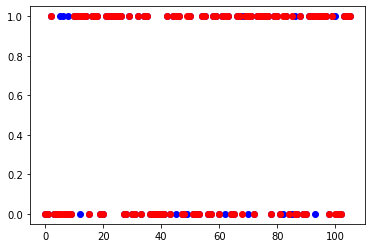

In [1256]:
indexes = [i for i in range(len(yprd))]
plt.scatter(x=indexes, y=yprd, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_cls_test))]
plt.scatter(x=indexes, y=Y_cls_test, color='red') # Red for data sample

Classification Naive Bayes

In [1257]:
#Importing pandas and numpy library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [1258]:
# Extracting data
data = pd.read_csv("./Heart Disease Dataset/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [1259]:
#checking for How many duplicate data are there
data.duplicated().sum()

723

In [1260]:
# Dropping all the duplicate rows
data.drop(axis = "rows", labels = data.index[data.duplicated()], inplace = True)

In [1261]:
# Standardizing all the given columns except the columns which take either 0 or 1 value and the target column
columns_to_standardize = ["age", "trestbps", "chol", "thalach", "oldpeak", "cp", "restecg", "slope", "ca", "thal"]
for i in columns_to_standardize:
    data[i] = (data[i]-data[i].mean())/data[i].std()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,1,-0.933658,-0.375932,-0.666622,0,0.900163,0.804700,0,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,1,-0.933658,0.478117,-0.840523,1,-1.000880,0.237102,1,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,1,-0.933658,0.762800,-1.400872,0,0.900163,-1.072740,1,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,1,-0.933658,0.933609,-0.840523,0,0.900163,0.499070,0,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,0,-0.933658,0.364243,0.917813,1,0.900163,-1.902307,0,0.737829,-0.644764,2.266164,-0.513143,0


In [1262]:
# Splitting the data into train and test in the ratio 65:35
data_training = data.sample(frac = 0.65, random_state = 50) # frac = 0.65
data_testing = data.drop(data_training.index)

In [1263]:
# For the X values we are dropping the target column and converting that dataframe into numpy array
X_class = data_training.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)
Y_class = data_training["target"].to_numpy().astype(np.float64)
X_class_test = data_testing.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)
Y_class_test = data_testing["target"].to_numpy().astype(np.float64)

In [1264]:
data_0 = data_training.loc[data_training['target'] == 0] # Data sample entries for which the target value is 0 
data_1 = data_training.loc[data_training['target'] == 1] # Data sample entries for which the target value is 0
data_num_0 = data_0.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)# dropping the target column and converting into numpy
data_num_1 = data_1.drop(axis = "columns", labels = "target").to_numpy().astype(np.float64)# dropping the target column and converting into numpy

In [1265]:
data_0.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
69,0.837698,0,-0.933658,1.616849,-1.594095,0,-1.000880,-0.199512,0,4.440091,-2.267418,2.266164,1.118111,0
429,-0.820132,1,1.004244,-1.343855,-0.067628,0,0.900163,0.106117,0,-0.898054,0.977891,-0.713727,-0.513143,0
113,0.285088,1,-0.933658,-1.229981,1.710030,0,0.900163,-0.286835,1,1.684920,-0.644764,0.279570,1.118111,0
67,-1.372742,1,-0.933658,0.250370,1.323582,0,0.900163,-1.072740,1,0.651730,-0.644764,-0.713727,-2.144396,0
39,0.285088,1,1.004244,-0.205123,-0.338141,0,-1.000880,0.018795,0,-0.553657,-0.644764,0.279570,1.118111,0


In [1266]:
data_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
137,1.058743,0,-0.933658,2.755581,1.516806,0,0.900163,0.193440,1,-0.898054,0.977891,-0.713727,-0.513143,1
521,0.395610,1,0.035293,-0.375932,-0.512043,0,0.900163,-0.243174,0,-0.553657,-0.644764,3.259461,1.118111,1
41,-0.046478,1,1.004244,-0.660615,0.222207,0,-1.000880,-0.112190,0,-0.553657,-0.644764,-0.713727,1.118111,1
549,1.500831,1,1.004244,-0.774489,0.589332,0,0.900163,0.062456,0,-0.037063,0.977891,0.279570,1.118111,1
355,-0.930654,0,-0.933658,0.364243,-0.067628,0,-1.000880,0.106117,1,-0.898054,-0.644764,-0.713727,-0.513143,1


We fit a gausian for each class and each feature column

In [1267]:
# Initializing means array wich will store a mean for each gausian
means = np.zeros((Y_count, X_class.shape[1]))
print(means.shape)

(2, 13)


In [1268]:
# Initializing stdDev array wich will store a standard deviation for each gausian
stdDev = np.zeros((Y_count, X_class.shape[1]))
print(stdDev.shape)

(2, 13)


In [1269]:
# Calculating and assigning the mean for each class feature and each class label
for i in range(X_class.shape[1]):#for each feature
    means[0][i] = np.mean(data_num_0[:, i])# for both class label 0 and 1
    means[1][i] = np.mean(data_num_1[:, i])

In [1270]:
# Calculating and assigning the mean for each class feature and each class label
for i in range(X_class.shape[1]): # for each feature
    stdDev[0][i] = np.std(data_num_0[:,i])# for both class label 0 and 1
    stdDev[1][i] = np.std(data_num_1[:,i])

In [1271]:
print(means)

[[ 0.22922001  0.83516484 -0.45450662  0.23285127  0.14003409  0.15384615
  -0.16525691 -0.41494056  0.56043956  0.34801807 -0.3416302   0.36689315
   0.41900218]
 [-0.23173379  0.57142857  0.39518911 -0.08582686 -0.11768243  0.11428571
   0.08543001  0.39927253  0.17142857 -0.31749961  0.34428326 -0.32586782
  -0.32671367]]


In [1272]:
print(stdDev)

[[0.87107981 0.37103171 0.88984151 1.15866351 0.9648036  0.36080121
  0.98474199 0.9349954  0.49633362 1.11862152 0.92894434 1.03759013
  1.11198152]
 [1.0089806  0.49487166 0.93854888 0.94696286 0.87149665 0.31815796
  0.94077205 0.77847098 0.37688303 0.74975025 0.9888053  0.82816631
  0.75727802]]


In [1273]:
def normal_distribution(z, mean, dev):
    return((1/dev*np.sqrt(2*np.pi))*np.exp((-1/2)*((z-mean)**2)/dev**2))

Inference for the Test data

In [1274]:
count_1 = data_testing["target"].sum() # number of 1's in the test data
count_0 = len(data_testing["target"])-count_1 # number of 1's in the test data

(PI for k=1 to m(P(X[i, k])|y_i = c_j))*P(y_i = c_j)

In [1275]:
Probability = np.zeros((X_class_test.shape[0], 1)) # Initializing the numpy array to store the classification value
for i in range(X_class_test.shape[0]): # for all data samples
    prob_0 = 1
    prob_1 = 1
    for j in range(X_class_test.shape[1]): # for all data features
        prob_0 = prob_0*normal_distribution(X_class_test[i, j], means[0, j], stdDev[0, j])*(count_0/(count_0+count_1))
        prob_1 = prob_1*normal_distribution(X_class_test[i, j], means[1, j], stdDev[1, j])*(count_1/(count_0+count_1))
    #Classification according to which class label has higher probability
    if(prob_0 > prob_1):
        Probability[i] = 0
    else:
        Probability[i] = 1

In [1276]:
print(Probability)

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [1277]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_class_test, Probability)

0.8113207547169812

In [1278]:
#reshaping yprd to 1 dimension
Probability = Probability.reshape(Probability.shape[0])

In [1279]:
# Implementing F1 score
confusionMatrix = confusion_matrix_mod(Y_class_test, Probability)
confusionMatrix = confusionMatrix.to_numpy()

In [1280]:
TP, FP, FN = calculateParams(confusionMatrix, Y_count)
f1_score = calculate_f1_score(TP, FP, FN)
print(f1_score)

0.8113207547169812


In [1281]:
# As we can see this F1 score is matching with scikit learn F1 score

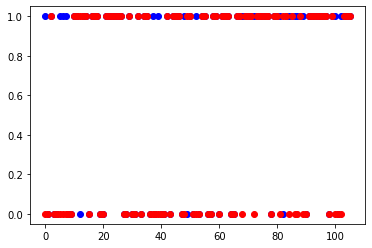

In [1282]:
indexes = [i for i in range(len(Probability))]
plt.scatter(x=indexes, y=Probability, color='blue') #blue for prediction
indexes = [i for i in range(len(Y_class_test))]
plt.scatter(x=indexes, y=Y_class_test, color='red') # Red for data sample